# CSE258 HW2

In [1]:
import urllib
import scipy.optimize
import random
import numpy
from math import exp
from math import log
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

### Task 1
After reshuffling the data, the train/validate/test performance are shown below:

lambda = 0;	train=0.748774509804; validate=0.757501530925; test=0.738518064911

lambda = 0.01;	train=0.748774509804; validate=0.756889161053; test=0.738518064911

lambda = 1.0;	train=0.729166666667; validate=0.753827311696; test=0.72933251684

lambda = 100.0;	train=0.66237745098; validate=0.681567666871; test=0.680342927128

We see the accuracy for train and validate part increase a little while the test accuracy decreases a little bit

In [2]:
random.seed(0)

def parseData(fname):
    for l in urllib.urlopen(fname):
        yield eval(l)

print "Reading data..."
dataFile = open("winequality-white.csv")
header = dataFile.readline()
fields = ["constant"] + header.strip().replace('"','').split(';')
featureNames = fields[:-1]
labelName = fields[-1]
lines = [[1.0] + [float(x) for x in l.split(';')] for l in dataFile]
random.shuffle(lines)
X = [l[:-1] for l in lines]
y = [l[-1] > 5 for l in lines]
print "done"

def inner(x,y):
    return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
    return 1.0 / (1 + exp(-x))

##################################################
# Logistic regression by gradient ascent         #
##################################################

# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
    loglikelihood = 0
    for i in range(len(X)):
        logit = inner(X[i], theta)
        loglikelihood -= log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= logit
    for k in range(len(theta)):
        loglikelihood -= lam * theta[k]*theta[k]
    # for debugging
    # print "ll =", loglikelihood
    return -loglikelihood

# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
    dl = [0]*len(theta)
    for i in range(len(X)):
        logit = inner(X[i], theta)
        for k in range(len(theta)):
            dl[k] += X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] -= X[i][k]
    for k in range(len(theta)):
        dl[k] -= lam*2*theta[k]
    return numpy.array([-x for x in dl])

X_train = X[:int(len(X)/3)]
y_train = y[:int(len(y)/3)]
X_validate = X[int(len(X)/3):int(2*len(X)/3)]
y_validate = y[int(len(y)/3):int(2*len(y)/3)]
X_test = X[int(2*len(X)/3):]
y_test = y[int(2*len(X)/3):]

##################################################
# Train                                          #
##################################################

def train(lam):
    theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
    return theta

##################################################
# Predict                                        #
##################################################

def performance(theta):
    scores_train = [inner(theta,x) for x in X_train]
    scores_validate = [inner(theta,x) for x in X_validate]
    scores_test = [inner(theta,x) for x in X_test]

    predictions_train = [s > 0 for s in scores_train]
    predictions_validate = [s > 0 for s in scores_validate]
    predictions_test = [s > 0 for s in scores_test]

    correct_train = [(a==b) for (a,b) in zip(predictions_train,y_train)]
    correct_validate = [(a==b) for (a,b) in zip(predictions_validate,y_validate)]
    correct_test = [(a==b) for (a,b) in zip(predictions_test,y_test)]
  
    acc_train = sum(correct_train) * 1.0 / len(correct_train)
    acc_validate = sum(correct_validate) * 1.0 / len(correct_validate)
    acc_test = sum(correct_test) * 1.0 / len(correct_test)
    return acc_train, acc_validate, acc_test

##################################################
# Validation pipeline                            #
##################################################

for lam in [0, 0.01, 1.0, 100.0]:
    theta = train(lam)
    acc_train, acc_validate, acc_test = performance(theta)
    print("lambda = " + str(lam) + ";\ttrain=" + str(acc_train) + "; validate=" + str(acc_validate) + "; test=" + str(acc_test))

Reading data...
done
lambda = 0;	train=0.748774509804; validate=0.757501530925; test=0.738518064911
lambda = 0.01;	train=0.748774509804; validate=0.756889161053; test=0.738518064911
lambda = 1.0;	train=0.729166666667; validate=0.753827311696; test=0.72933251684
lambda = 100.0;	train=0.66237745098; validate=0.681567666871; test=0.680342927128


### Task 2
The number of

true positives = 1129;
true negatives = 145;
false positives = 321;
false negatives = 38

The Balanced Error Rate is 0.360701663412

In [3]:
random.seed(0)

def parseData(fname):
    for l in urllib.urlopen(fname):
        yield eval(l)

print "Reading data..."
dataFile = open("winequality-white.csv")
header = dataFile.readline()
fields = ["constant"] + header.strip().replace('"','').split(';')
featureNames = fields[:-1]
labelName = fields[-1]
lines = [[1.0] + [float(x) for x in l.split(';')] for l in dataFile]
# random.shuffle(lines)
X = [l[:-1] for l in lines]
y = [l[-1] > 5 for l in lines]
print "done"

def inner(x,y):
    return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
    return 1.0 / (1 + exp(-x))

##################################################
# Logistic regression by gradient ascent         #
##################################################

# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
    loglikelihood = 0
    for i in range(len(X)):
        logit = inner(X[i], theta)
        loglikelihood -= log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= logit
    for k in range(len(theta)):
        loglikelihood -= lam * theta[k]*theta[k]
    # for debugging
    # print "ll =", loglikelihood
    return -loglikelihood

# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
    dl = [0]*len(theta)
    for i in range(len(X)):
        logit = inner(X[i], theta)
        for k in range(len(theta)):
            dl[k] += X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] -= X[i][k]
    for k in range(len(theta)):
        dl[k] -= lam*2*theta[k]
    return numpy.array([-x for x in dl])

X_train = X[:int(len(X)/3)]
y_train = y[:int(len(y)/3)]
X_validate = X[int(len(X)/3):int(2*len(X)/3)]
y_validate = y[int(len(y)/3):int(2*len(y)/3)]
X_test = X[int(2*len(X)/3):]
y_test = y[int(2*len(X)/3):]

##################################################
# Train                                          #
##################################################

def train(lam):
    theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
    return theta

##################################################
# Predict                                        #
##################################################

def performance(theta):
    scores_train = [inner(theta,x) for x in X_train]
    scores_validate = [inner(theta,x) for x in X_validate]
    scores_test = [inner(theta,x) for x in X_test]

    predictions_train = [s > 0 for s in scores_train]
    predictions_validate = [s > 0 for s in scores_validate]
    predictions_test = [s > 0 for s in scores_test]

    correct_train = [(a==b) for (a,b) in zip(predictions_train,y_train)]
    correct_validate = [(a==b) for (a,b) in zip(predictions_validate,y_validate)]
    correct_test = [(a==b) for (a,b) in zip(predictions_test,y_test)]
  
    acc_train = sum(correct_train) * 1.0 / len(correct_train)
    acc_validate = sum(correct_validate) * 1.0 / len(correct_validate)
    acc_test = sum(correct_test) * 1.0 / len(correct_test)
    return acc_train, acc_validate, acc_test, predictions_test, scores_test

##################################################
# Validation pipeline                            #
##################################################

# for lam in [0, 0.01, 1.0, 100.0]:
lam = 0.01
theta = train(lam)
acc_train, acc_validate, acc_test, predictions_test, scores_test = performance(theta)
print("lambda = " + str(lam) + ";\ttrain=" + str(acc_train) + "; validate=" + str(acc_validate) + "; test=" + str(acc_test))

Reading data...
done
lambda = 0.01;	train=0.732230392157; validate=0.721984078383; test=0.780159216167


In [5]:
num_TP = sum([(a==1 and b==1) for (a,b) in zip(predictions_test,y_test)])
num_TN = sum([(a==0 and b==0) for (a,b) in zip(predictions_test,y_test)])
num_FP = sum([(a==1 and b==0) for (a,b) in zip(predictions_test,y_test)])
num_FN = sum([(a==0 and b==1) for (a,b) in zip(predictions_test,y_test)])
BER = 1.0/2 * ((num_FP * 1.0 / (num_FP + num_TN)) + (num_FN * 1.0 / (num_FN + num_TP)))
print("true positives = " + str(num_TP) + ";\ntrue negatives = " + str(num_TN)
      + ";\nfalse positives = " + str(num_FP) + ";\nfalse negatives = " + str(num_FN))
print("Balanced Error Rate: " + str(BER))

true positives = 1129;
true negatives = 145;
false positives = 321;
false negatives = 38
Balanced Error Rate: 0.360701663412


### Task 3
For top 10 predictions, precision = 1.0; recall = 0.00856898029135

For top 500 predictions, precision = 0.956; recall = 0.409597257926

For top 1000 predictions, precision = 0.864; recall = 0.740359897172

In [6]:
confi_ordered = zip(scores_test, y_test)
confi_ordered.sort(key = lambda x : x[0], reverse = True)

for i in [10, 500, 1000]:
    data = confi_ordered[:i]
    trues = filter(lambda x : x[1] == True, data)
    precision = len(trues) * 1.0 / i
    recall = len(trues) * 1.0 / sum(y_test)
    print("For top " + str(i) + " predictions, precision = " + str(precision) + "; recall = " + str(recall))

For top 10 predictions, precision = 1.0; recall = 0.00856898029135
For top 500 predictions, precision = 0.956; recall = 0.409597257926
For top 1000 predictions, precision = 0.864; recall = 0.740359897172


### Task 4

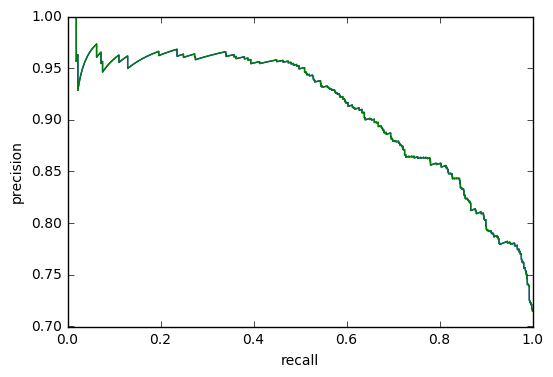

In [8]:
Precision = numpy.zeros(len(y_test)-1)
Recall = numpy.zeros(len(y_test)-1)

for i in range(1, len(y_test)):
    data = confi_ordered[:i]
    trues = filter(lambda x : x[1] == True, data)
    precision = len(trues) * 1.0 / i
    recall = len(trues) * 1.0 / sum(y_test)
    Precision[i-1] = precision
    Recall[i-1] = recall
plt.plot(Recall, Precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.ylim([0.7, 1])
plt.show()

### Task 5
The reconstruction error is  3675818.61688

In [9]:
X_11d = [x[1:] for x in X_train]
get_mean = numpy.mean(X_11d, axis = 0)
diff = numpy.array([x - get_mean for x in X_11d])
recon_error = numpy.sum(diff*diff)
print "The reconstruction error is ", recon_error

The reconstruction error is  3675818.61688


### Task 6


In [10]:
pca = PCA(n_components = 11)
pca.fit(X_11d)
print pca.components_

[[  3.23636346e-04  -1.42201752e-04  -3.17030713e-04  -5.36390435e-02
   -9.30284526e-05  -2.54030965e-01  -9.65655009e-01  -3.19990241e-05
    2.95831396e-04  -3.84043646e-04   1.00526693e-02]
 [ -7.57985623e-03  -1.66366340e-03   1.04742899e-03   5.21677266e-02
    4.49425600e-05   9.65020304e-01  -2.56793964e-01   7.90089050e-06
    5.24900596e-04  -1.09699394e-03  -2.89827657e-03]
 [  1.82124420e-02   2.54680710e-03   3.31838657e-03   9.93221259e-01
   -1.51888372e-04  -6.42297821e-02  -3.91682592e-02   4.30929482e-04
   -6.93199060e-03  -2.85216045e-03  -8.62920933e-02]
 [ -1.56811999e-01  -3.28220652e-03  -1.66866136e-02  -8.28549640e-02
    6.91822288e-03  -1.13029682e-03  -5.39110108e-03   9.49080503e-04
   -2.68027305e-03  -1.30498102e-03  -9.83955205e-01]
 [ -9.81360642e-01   1.45890108e-02  -5.92643662e-02   3.17546064e-02
   -5.07483182e-04  -8.43759364e-03   1.77578042e-03  -6.03725221e-04
    9.05011239e-02   9.35630845e-03   1.54417839e-01]
 [ -7.76578401e-02   2.3766588

### Task 7
The reconstruction error for 4-dimension PCA is 1345.4755741

It's just the rest of variance we lost when we do 4-dimension PCA. We see the total variance with 4 components is 3674473.1413. Sum of them is just the total variance in 11 dimensions in Task 5.

In [11]:
print "The reconstruction error for 4-dimension PCA is ", numpy.sum(pca.explained_variance_[4:])*len(X_train)

The reconstruction error for 4-dimension PCA is  1345.4755741


In [12]:
pca = PCA(n_components = 4)
pca.fit(X_11d)
print numpy.sum(pca.explained_variance_[:])*len(X_train)
transform = pca.components_

3674473.1413


### Task 8
The MSE goes down as more and more dimensions are used

The MSE change on the train set is:  [0.86384243973592434, 0.84466943185576071, 0.82751611558520088, 0.69738327887529172, 0.68550155987923889, 0.6608539889873275, 0.65919451154521747, 0.65848602461025896, 0.63685661427823248, 0.63468781914815453, 0.61721175854356825]

THe MSE change on the test set is:  [0.66348348996669526, 0.6555874931669381, 0.67835915193077811, 0.59909062198092344, 0.62319815648296806, 0.60387838007105377, 0.5972799592490402, 0.59450622441189893, 0.55550509614578347, 0.55620192020640657, 0.56887177280462198]

In [27]:
y_train_pca = [l[-1] for l in lines[:int(len(lines)/3)]]
y_test_pca = [l[-1] for l in lines[int(2*len(lines)/3):]]

In [28]:
MSE_train = []
MSE_test = []
for i in range(1,12):
    pca = PCA(n_components = i)
    X_deduced = numpy.concatenate((numpy.ones((len(X_train),1)), pca.fit_transform(X_11d)), axis=1)
    result = numpy.linalg.lstsq(X_deduced, numpy.array(y_train_pca))
    MSE_train.append(result[1][0] / len(y_train_pca))
    test_deduced = numpy.concatenate((numpy.ones((len(X_test),1)), pca.transform([x[1:] for x in X_test])), axis=1)
    MSE_test.append(mean_squared_error(numpy.dot(test_deduced, result[0]), y_test_pca))

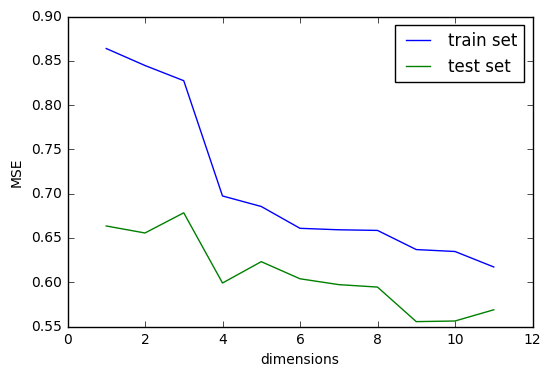

In [29]:
dim = numpy.arange(1,12,1)
train, = plt.plot(dim, MSE_train)
test, = plt.plot(dim, MSE_test)
plt.xlabel('dimensions')
plt.ylabel('MSE')
plt.legend([train, test], ["train set", "test set"])
plt.show()

In [30]:
print "The MSE change on the train set is: ", MSE_train
print "THe MSE change on the test set is: ", MSE_test

The MSE change on the train set is:  [0.86384243973592434, 0.84466943185576071, 0.82751611558520088, 0.69738327887529172, 0.68550155987923889, 0.6608539889873275, 0.65919451154521747, 0.65848602461025896, 0.63685661427823248, 0.63468781914815453, 0.61721175854356825]
THe MSE change on the test set is:  [0.66348348996669526, 0.6555874931669381, 0.67835915193077811, 0.59909062198092344, 0.62319815648296806, 0.60387838007105377, 0.5972799592490402, 0.59450622441189893, 0.55550509614578347, 0.55620192020640657, 0.56887177280462198]
